WORK TO BE DONE-

-Models to be evaluated(IMPLEMENTED BEFORE BALANCING)

KNearestNeighbors

LogisticRegression


NaiveBayes (Gaussian, Bernoulli, Multinomial)

DecicionTree

RandomForest

XGBoost

-THE OUTPUT AFTER IMPLEMENTING THE MODELS SHOULD BE ACCURACY, PRECISION, F1 SCORE, RECALL

- PLOT ROC AND PRECISION- RECALL CURVES FOR THE 2 BEST PERFORMING MODELS

- AFTER THE BALANCING , PLOT THE DIFFERENCE FOR THE 2 BEST PERFORMING MODELS(I.E DIFFERENCE BEFORE AND AFTER BALANCING IN THE CURVES)

-PLOT THE CONFUSION MATRICES OF THE 2 BEST PERFORMING MODELS

-PLOT THE FEATURE IMPOTANCE CHART FOR BOTH THE BEST PERFORMING MODELS

-DO MODEL EMSEMBLING FOR THE 2 BEST MODELS

-FIND THE BEST PERFORMING MODEL BY USING PARAMETER TUNING




In [1]:
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Basics
import pandas as pd
import psycopg2 as pg
import numpy as np
import pickle

# Visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import *

# Models
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # Replace with your own model
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model support
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, f1_score, auc,
                             precision_score, recall_score, roc_auc_score, roc_curve,
                             precision_recall_curve)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score

In [2]:
df = pd.read_csv(r'C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\ID 3114\twitter_human_bots_dataset.csv')
df

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,...,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,profile_image_path,profile_background_image_path,split
0,0,2009-07-04 22:41:51,False,False,NaN,5007,102,168,False,53779179,...,https://pbs.twimg.com/profile_images/128969130...,paty_castroo,3974,False,0.978,4063,bot,NaN,NaN,0
1,1,2010-01-17 22:54:19,False,False,Television producer. Emmy Award winner. Disney...,1038,60,128,False,105916557,...,https://pbs.twimg.com/profile_images/632916759...,CBirckner,259,False,0.067,3866,human,profile_images/4691ae58668d932bb7e7af22141aecf...,profile_images/4691ae58668d932bb7e7af22141aecf...,0
2,2,2012-03-01 06:05:32,False,False,NaN,2257,599,449,True,509788597,...,https://pbs.twimg.com/profile_images/128853844...,amf_jay,13627,False,4.406,3093,human,NaN,NaN,0
3,3,2009-09-01 04:52:30,False,False,NaN,6407,116,334,True,70601327,...,https://pbs.twimg.com/profile_images/977012905...,SaraCavolo,4432,False,1.107,4005,human,profile_images/d1da9220e4aa376dff03b6f12765171...,profile_images/d1da9220e4aa376dff03b6f12765171...,0
4,4,2010-01-27 17:17:23,False,False,Productor de Televisión - Embajador de @Tienda...,20866,74448,18,True,108999927,...,https://pbs.twimg.com/profile_images/668449819...,DavidHenaoModel,15870,True,4.116,3856,human,profile_images/c65bf625b066ef5f29e14cfcf1ee91f...,profile_images/c65bf625b066ef5f29e14cfcf1ee91f...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37433,37433,2010-12-07 08:11:16,False,False,"Self Made Plus Model, #BeautyIsNotASize, CEO @...",59660,257294,196,True,223764929,...,https://pbs.twimg.com/profile_images/712018970...,AshAlexiss,58680,True,16.562,3543,human,profile_images/a2821682b21168555a2ec5e28a3ac81...,profile_images/a2821682b21168555a2ec5e28a3ac81...,2
37434,37434,2010-12-04 13:17:22,False,False,Gazeteci/Journalist ...,0,74666,95,False,222789645,...,https://pbs.twimg.com/profile_images/127353595...,ahmemis,41240,True,11.633,3545,human,NaN,NaN,2
37435,37435,2009-10-06 23:53:30,False,False,Modelo y Actriz Venezolana/ Venezuelan Model &...,28,255941,236,True,80438218,...,https://pbs.twimg.com/profile_images/114651544...,Yuvannamontalvo,6692,False,1.686,3969,human,NaN,NaN,2
37436,37436,2013-03-24 21:04:16,True,False,Indian!...Actor!...Need no more!,621,2678042,51,False,1296642259,...,https://pbs.twimg.com/profile_images/129570440...,IAmVarunTej,2042,True,0.755,2704,human,NaN,NaN,2


In [3]:
df.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,...,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,profile_image_path,profile_background_image_path,split
0,0,2009-07-04 22:41:51,False,False,NaN,5007,102,168,False,53779179,...,https://pbs.twimg.com/profile_images/128969130...,paty_castroo,3974,False,0.978,4063,bot,NaN,NaN,0
1,1,2010-01-17 22:54:19,False,False,Television producer. Emmy Award winner. Disney...,1038,60,128,False,105916557,...,https://pbs.twimg.com/profile_images/632916759...,CBirckner,259,False,0.067,3866,human,profile_images/4691ae58668d932bb7e7af22141aecf...,profile_images/4691ae58668d932bb7e7af22141aecf...,0
2,2,2012-03-01 06:05:32,False,False,NaN,2257,599,449,True,509788597,...,https://pbs.twimg.com/profile_images/128853844...,amf_jay,13627,False,4.406,3093,human,NaN,NaN,0
3,3,2009-09-01 04:52:30,False,False,NaN,6407,116,334,True,70601327,...,https://pbs.twimg.com/profile_images/977012905...,SaraCavolo,4432,False,1.107,4005,human,profile_images/d1da9220e4aa376dff03b6f12765171...,profile_images/d1da9220e4aa376dff03b6f12765171...,0
4,4,2010-01-27 17:17:23,False,False,Productor de Televisión - Embajador de @Tienda...,20866,74448,18,True,108999927,...,https://pbs.twimg.com/profile_images/668449819...,DavidHenaoModel,15870,True,4.116,3856,human,profile_images/c65bf625b066ef5f29e14cfcf1ee91f...,profile_images/c65bf625b066ef5f29e14cfcf1ee91f...,0


In [4]:
df['bot'] = df['account_type'].apply(lambda x: 1 if x == 'bot' else 0)
df['default_profile'] = df['default_profile'].astype(int)
df['default_profile'] = df['default_profile'].astype(int)
df['default_profile_image'] = df['default_profile_image'].astype(int)
df['geo_enabled'] = df['geo_enabled'].astype(int)
df['verified'] = df['verified'].astype(int)

# datetime conversion
df['created_at'] = pd.to_datetime(df['created_at'])
# hour created
df['hour_created'] = pd.to_datetime(df['created_at']).dt.hour

In [5]:
dfr = df[['bot', 'screen_name', 'created_at', 'hour_created', 'verified', 'location', 'geo_enabled', 'lang',
             'default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 'friends_count',
             'statuses_count', 'average_tweets_per_day', 'account_age_days']]

In [6]:
del df

In [7]:
dfr.head()

,bot,screen_name,created_at,hour_created,verified,location,geo_enabled,lang,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,average_tweets_per_day,account_age_days
0,1,paty_castroo,2009-07-04 22:41:51,22,0,"Maringá, Brasil",0,NaN,0,0,5007,102,168,3974,0.978,4063
1,0,CBirckner,2010-01-17 22:54:19,22,0,Atlanta,0,en,0,0,1038,60,128,259,0.067,3866
2,0,amf_jay,2012-03-01 06:05:32,6,0,unknown,1,NaN,0,0,2257,599,449,13627,4.406,3093
3,0,SaraCavolo,2009-09-01 04:52:30,4,0,"Brooklyn, NY",1,NaN,0,0,6407,116,334,4432,1.107,4005
4,0,DavidHenaoModel,2010-01-27 17:17:23,17,1,"Miami, FL",1,es,0,0,20866,74448,18,15870,4.116,3856


In [8]:
dfr.describe()

,bot,hour_created,verified,geo_enabled,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,average_tweets_per_day,account_age_days
count,37438.000000,37438.000000,37438.000000,37438.000000,37438.000000,37438.000000,37438.000000,3.743800e+04,3.743800e+04,3.743800e+04,37438.000000,37438.000000
mean,0.331882,12.371040,0.201693,0.456141,0.419894,0.014905,12302.062183,3.703098e+05,4.445925e+03,2.107339e+04,6.891668,3022.128052
std,0.470895,7.325433,0.401270,0.498079,0.493548,0.121173,33923.650237,2.470829e+06,4.954520e+04,6.732977e+04,24.580116,1013.695870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,483.000000
25%,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,362.000000,3.500000e+01,3.700000e+01,1.336250e+03,0.495000,2316.250000
50%,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,2066.000000,3.650000e+02,2.960000e+02,4.209000e+03,1.488000,3219.000000
75%,1.000000,19.000000,0.000000,1.000000,1.000000,0.000000,8879.000000,8.440250e+03,8.930000e+02,1.715375e+04,5.528000,3888.000000
max,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,885123.000000,1.216415e+08,4.343060e+06,2.771910e+06,1269.055000,5158.000000


In [9]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   bot                     37438 non-null  int64         
 1   screen_name             37438 non-null  object        
 2   created_at              37438 non-null  datetime64[ns]
 3   hour_created            37438 non-null  int64         
 4   verified                37438 non-null  int32         
 5   location                37435 non-null  object        
 6   geo_enabled             37438 non-null  int32         
 7   lang                    29481 non-null  object        
 8   default_profile         37438 non-null  int32         
 9   default_profile_image   37438 non-null  int32         
 10  favourites_count        37438 non-null  int64         
 11  followers_count         37438 non-null  int64         
 12  friends_count           37438 non-null  int64 

In [10]:
dfr.isnull().sum()

bot                          0
screen_name                  0
created_at                   0
hour_created                 0
verified                     0
location                     3
geo_enabled                  0
lang                      7957
default_profile              0
default_profile_image        0
favourites_count             0
followers_count              0
friends_count                0
statuses_count               0
average_tweets_per_day       0
account_age_days             0
dtype: int64

### Scale visualisations to fit bot/human relatively

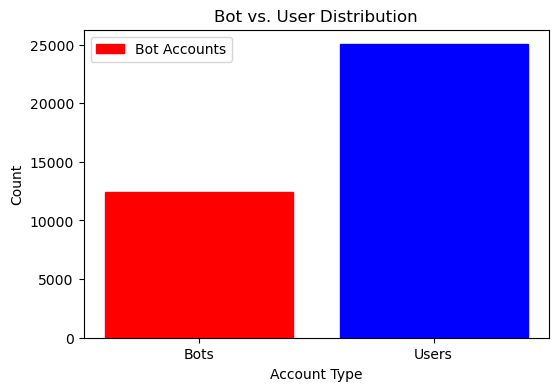

In [11]:
# Sample data
# dfr = {'bot': [True, False, True, False, True, False]}

# Calculate the number of bots and humans
num_bots = dfr['bot'].sum()
num_users = len(dfr) - num_bots

# Define colors for bot and human bars
bot_color = 'red'
human_color = 'blue'

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size for human interface
bars = plt.bar(['Bots', 'Users'], [num_bots, num_users])

# Assign colors to bars
bars[0].set_color(bot_color)  # Bot bar
bars[1].set_color(human_color)  # Human bar

plt.title('Bot vs. User Distribution')
plt.xlabel('Account Type')
plt.ylabel('Count')

# Custom legend labels
legend_labels = ['Bot Accounts', 'Human Accounts']

# Check if the visualization is for a bot interface
display_for_bot = True

if display_for_bot:
    # Adjust the figure size for the bot interface
    plt.gcf().set_size_inches(6, 4)
    
    # Set custom legend labels
    plt.legend(legend_labels)

# Save or display the plot
if display_for_bot:
    plt.savefig('bot_visualization.png')  # Save the plot for the bot interface
else:
    plt.show()  # Display the plot in a human interface

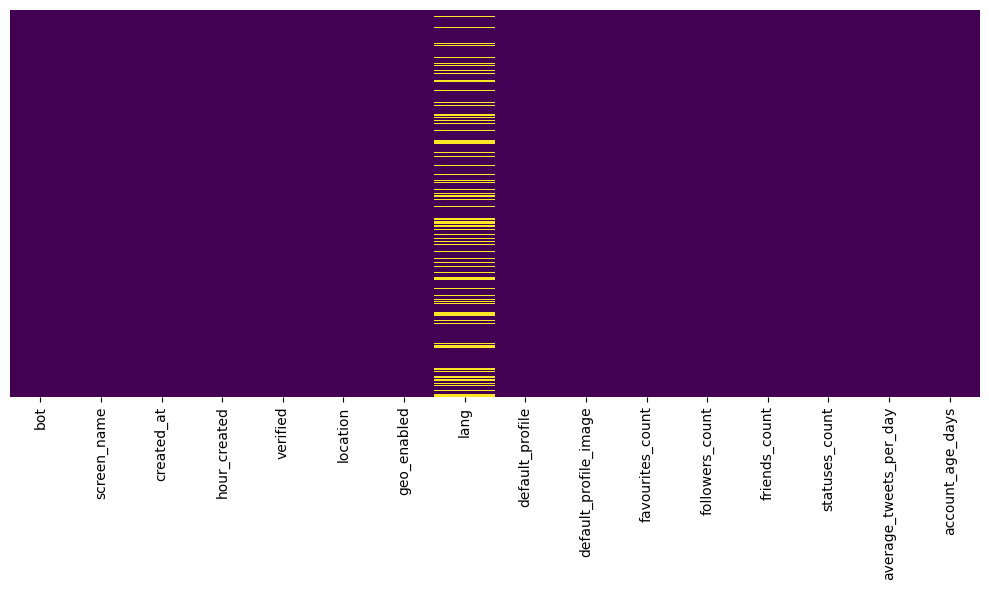

In [12]:
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(dfr)

In [13]:
dfr.corr(method='spearman')

,bot,hour_created,verified,geo_enabled,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,average_tweets_per_day,account_age_days
bot,1.000000,-0.038169,-0.309593,-0.336145,0.290070,0.092601,-0.322031,-0.501959,-0.426074,-0.304257,-0.273598,-0.230037
hour_created,-0.038169,1.000000,0.056505,0.013082,-0.035677,0.003095,0.014405,0.063930,0.044371,0.028382,0.023798,0.032696
verified,-0.309593,0.056505,1.000000,0.196153,-0.264979,-0.058531,0.089247,0.644321,0.289737,0.284226,0.229656,0.369423
geo_enabled,-0.336145,0.013082,0.196153,1.000000,-0.273882,-0.095831,0.340518,0.385186,0.366762,0.365665,0.326320,0.266917
default_profile,0.290070,-0.035677,-0.264979,-0.273882,1.000000,0.115994,-0.231188,-0.467994,-0.333771,-0.405820,-0.334909,-0.462041
default_profile_image,0.092601,0.003095,-0.058531,-0.095831,0.115994,1.000000,-0.151153,-0.151764,-0.116620,-0.138945,-0.135270,-0.051714
favourites_count,-0.322031,0.014405,0.089247,0.340518,-0.231188,-0.151153,1.000000,0.346601,0.537843,0.578703,0.576589,0.157650
followers_count,-0.501959,0.063930,0.644321,0.385186,-0.467994,-0.151764,0.346601,1.000000,0.642473,0.654346,0.603711,0.427615
friends_count,-0.426074,0.044371,0.289737,0.366762,-0.333771,-0.116620,0.537843,0.642473,1.000000,0.586398,0.558020,0.309529
statuses_count,-0.304257,0.028382,0.284226,0.365665,-0.405820,-0.138945,0.578703,0.654346,0.586398,1.000000,0.976497,0.348332


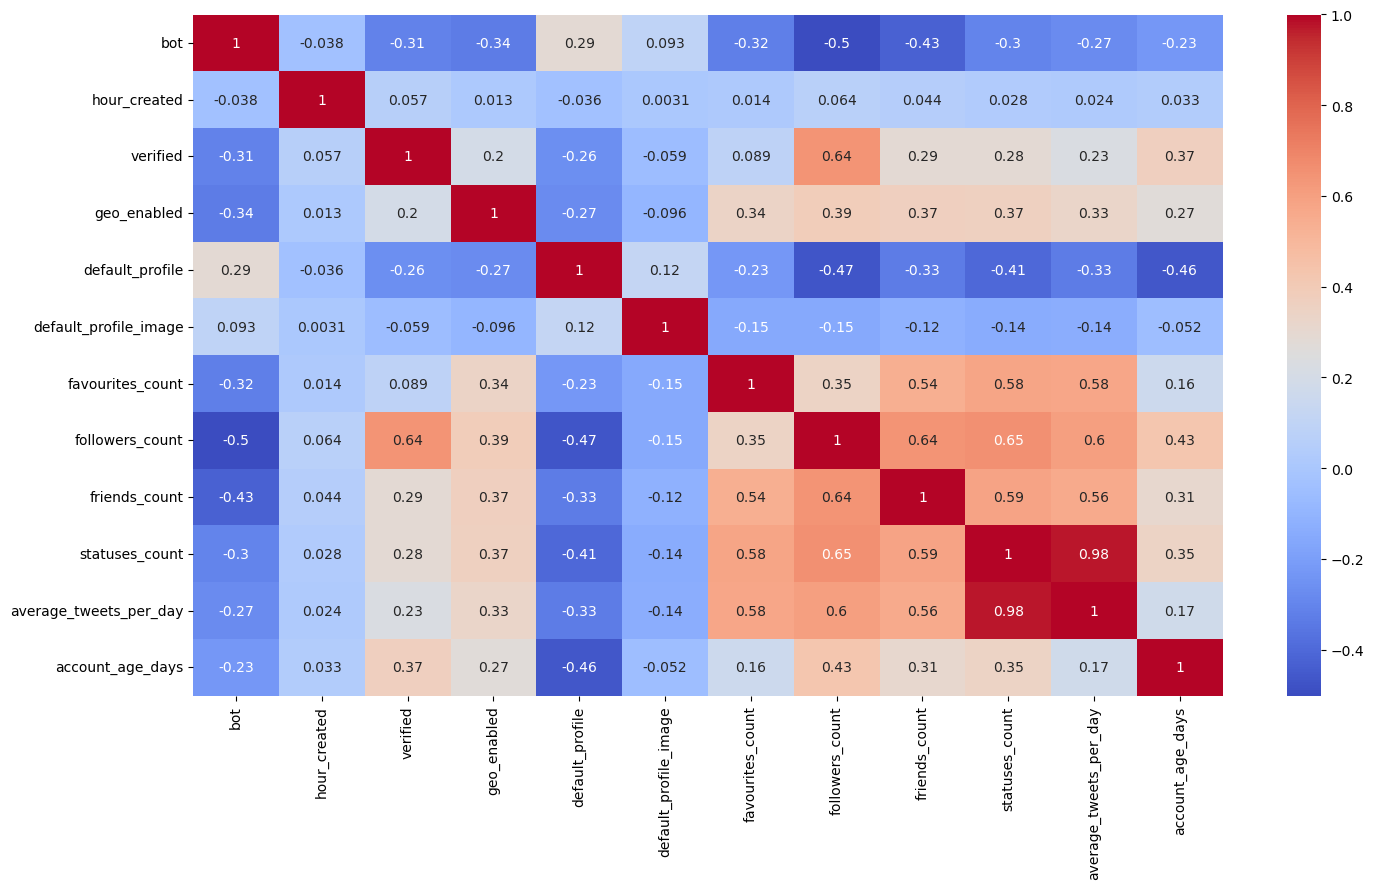

In [14]:
plt.figure(figsize=(15,9))
sns.heatmap(dfr.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [15]:
dfr['bot'].value_counts(dropna=False)

0    25013
1    12425
Name: bot, dtype: int64

Text(0.5, 1.0, 'BOT vs COUNT (1=BOT 2=HUMAN)')

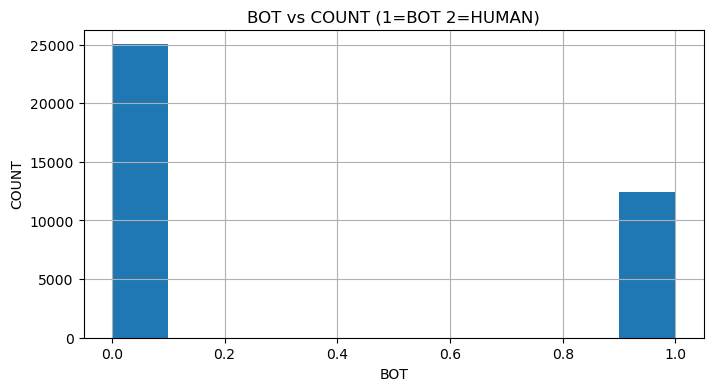

In [16]:
plt.figure(figsize=(8,4))
dfr['bot'].hist()
plt.xlabel('BOT')
plt.ylabel('COUNT')
plt.title('BOT vs COUNT (1=BOT 2=HUMAN)')

In [17]:
# Interesting features to look at:
dfr['avg_daily_followers'] = np.round(dfr['followers_count'] / dfr['account_age_days'])
dfr['avg_daily_friends'] = np.round(dfr['followers_count'] / dfr['account_age_days'])
dfr['avg_daily_favorites'] = np.round(dfr['followers_count'] / dfr['account_age_days'])

# Log transformations for highly skewed data
dfr['friends_log'] = np.round(np.log(1 + dfr['friends_count']), 3)
dfr['followers_log'] = np.round(np.log(1 + dfr['followers_count']), 3)
dfr['favs_log'] = np.round(np.log(1 + dfr['favourites_count']), 3)
dfr['avg_daily_tweets_log'] = np.round(np.log(1+ dfr['average_tweets_per_day']), 3)

# Possible interaction features
dfr['network'] = np.round(dfr['friends_log'] * dfr['followers_log'], 3)
dfr['tweet_to_followers'] = np.round(np.log( 1+ dfr['statuses_count']) * np.log(1+ dfr['followers_count']), 3)

# Log-transformed daily acquisition metrics for dist. plots
dfr['follower_acq_rate'] = np.round(np.log(1 + (dfr['followers_count'] / dfr['account_age_days'])), 3)
dfr['friends_acq_rate'] = np.round(np.log(1 + (dfr['friends_count'] / dfr['account_age_days'])), 3)
dfr['favs_rate'] = np.round(np.log(1 + (dfr['friends_count'] / dfr['account_age_days'])), 3)

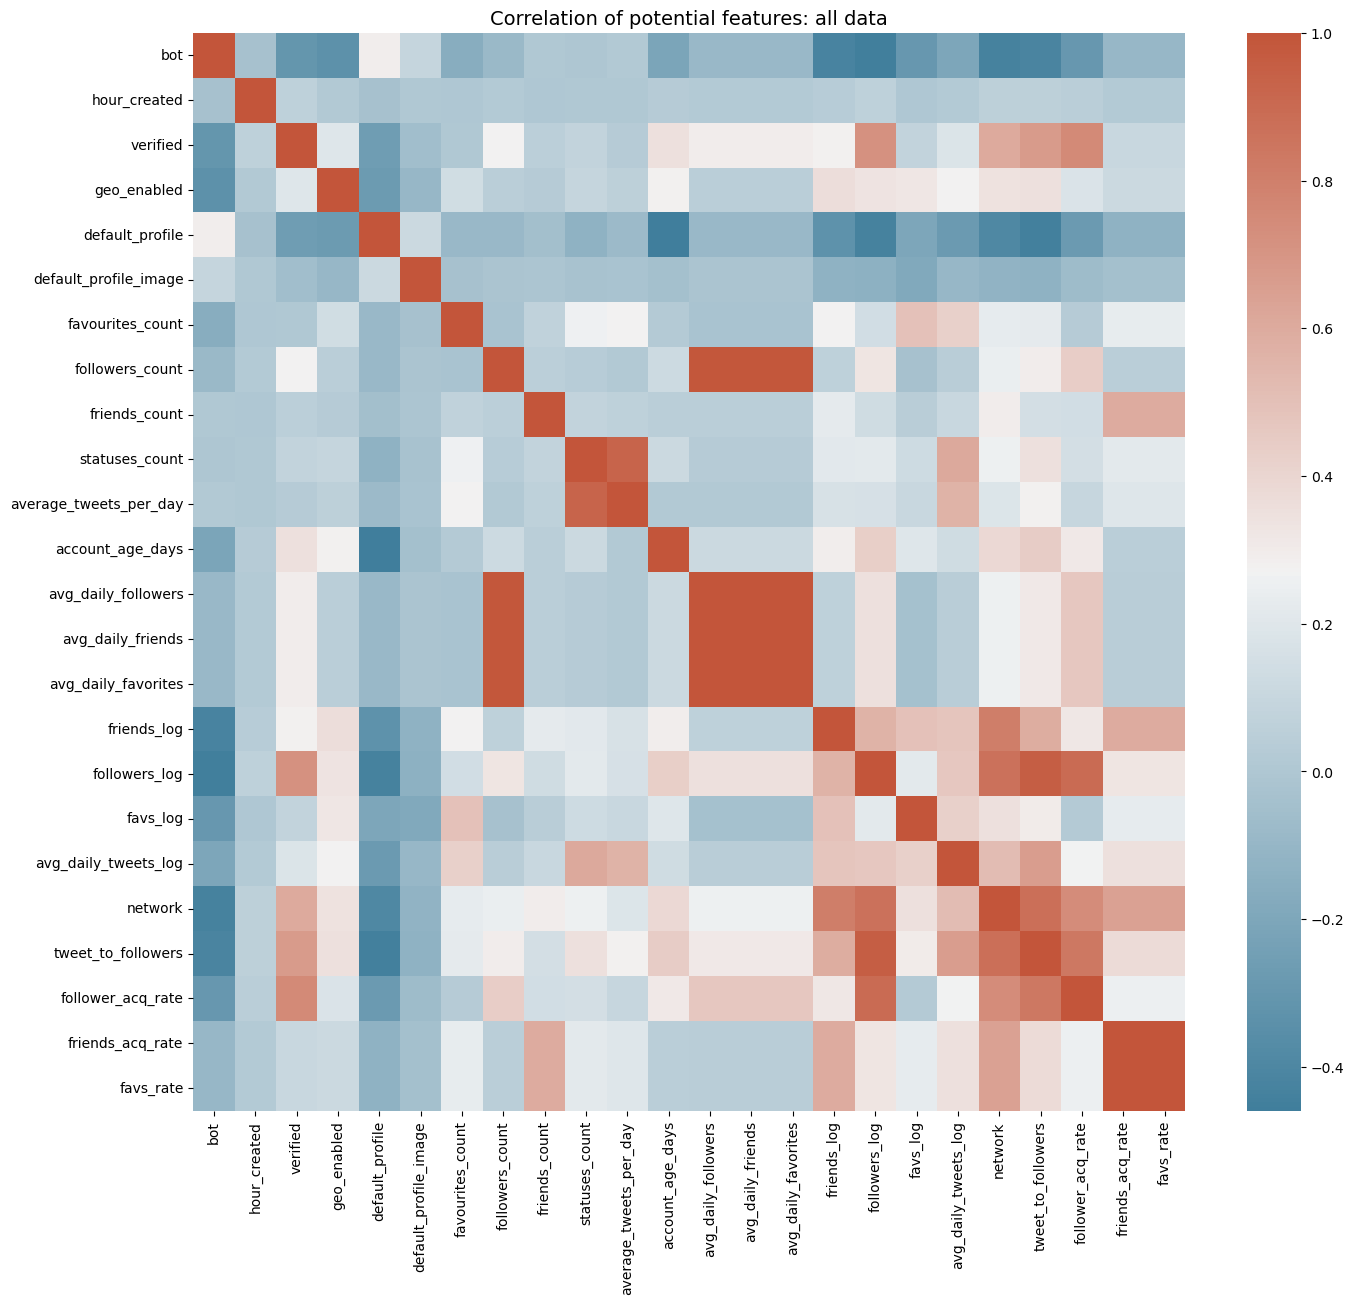

In [18]:
plt.figure(figsize=(16,14), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(dfr.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: all data', fontsize=14);

In [19]:
bots = dfr[dfr['bot'] == 1]
humans = dfr[dfr['bot'] == 0]

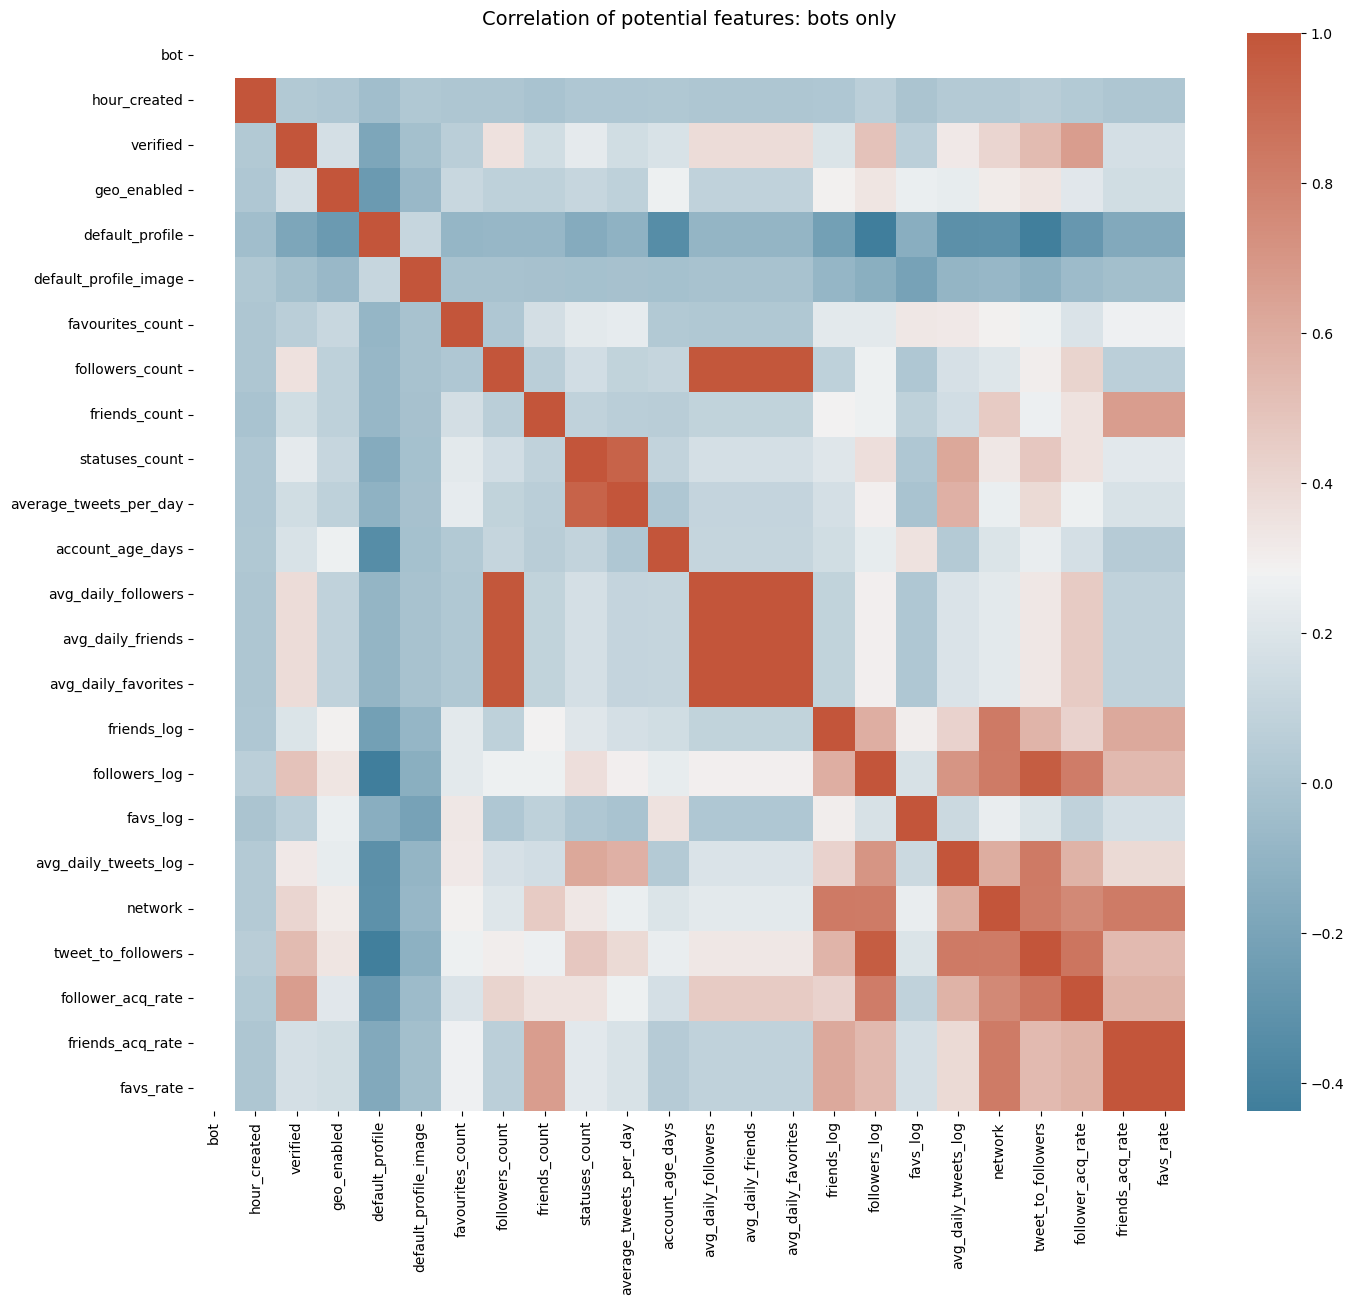

In [20]:
plt.figure(figsize=(16,14), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(bots.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: bots only', fontsize=14);

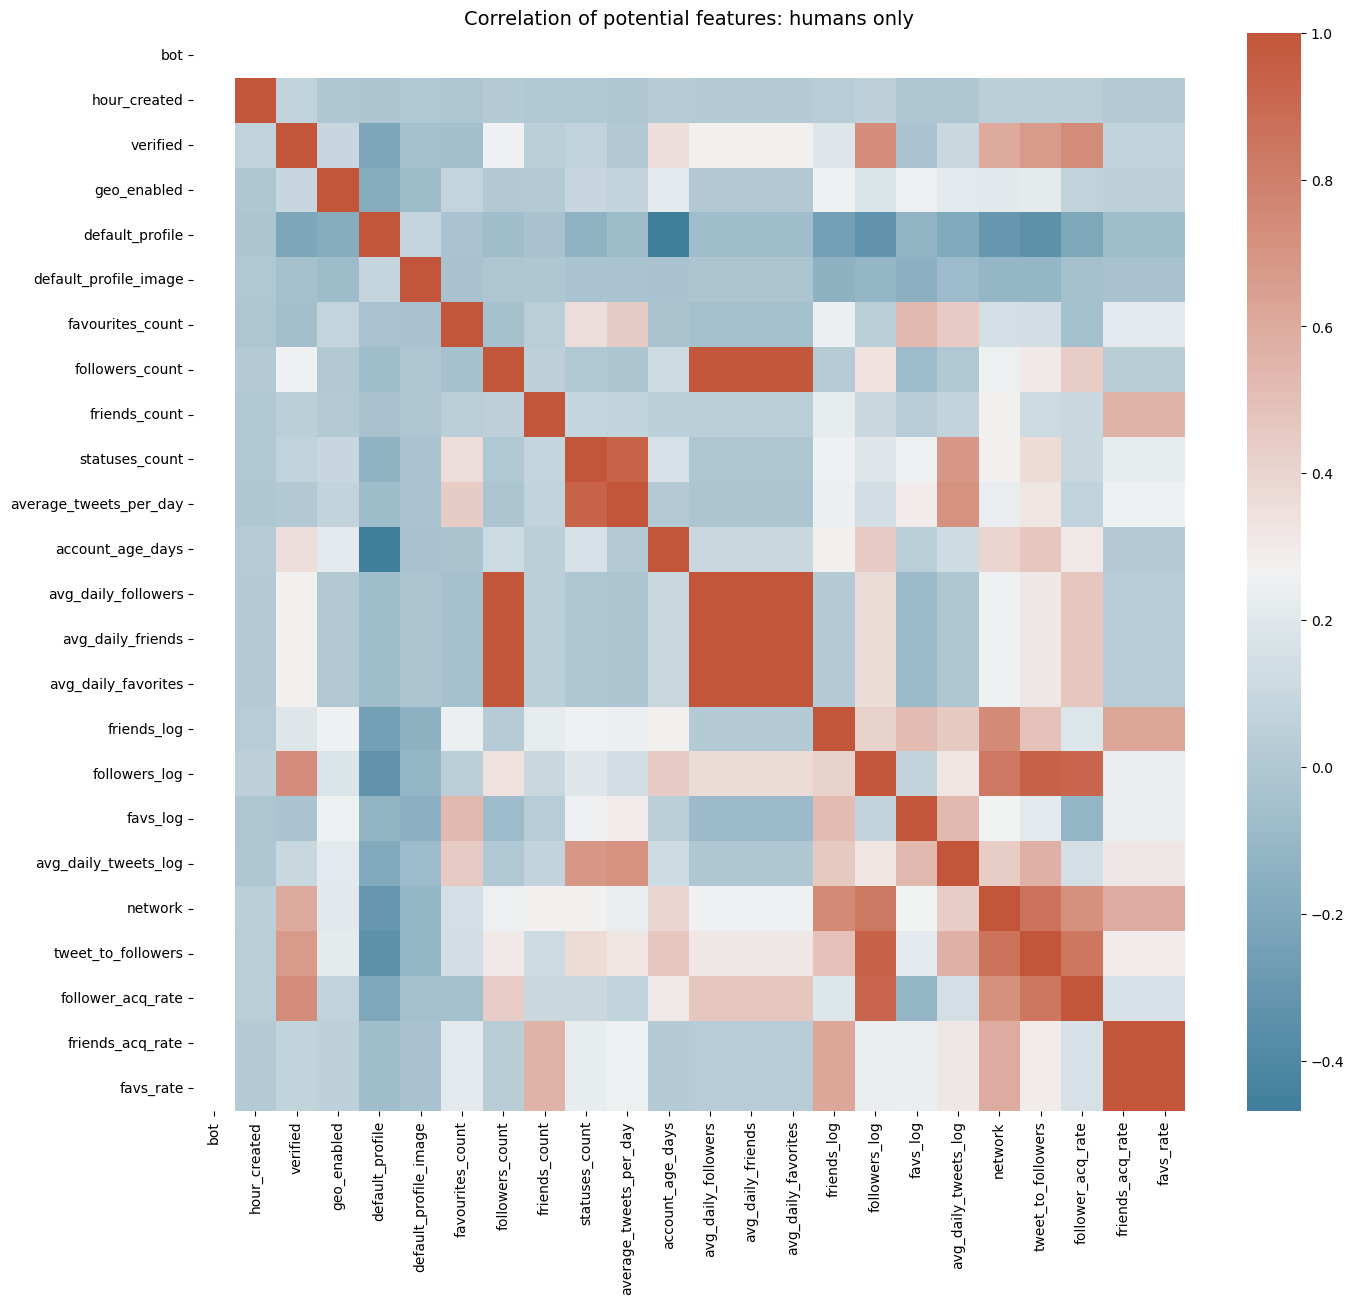

In [21]:
plt.figure(figsize=(16,14), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(humans.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: humans only', fontsize=14);

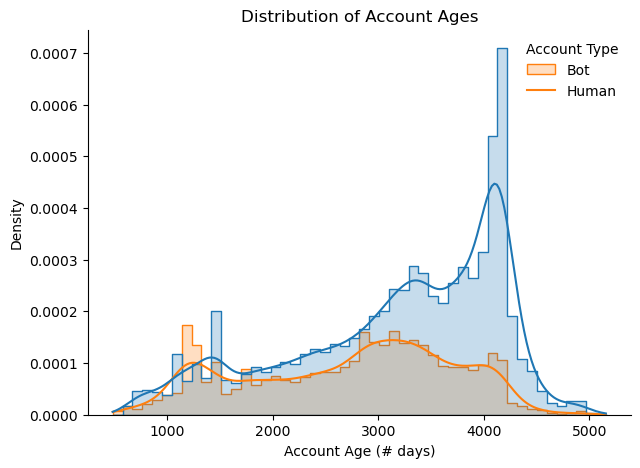

In [22]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='account_age_days', data=dfr, hue='bot', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Account Ages', fontsize=12)
plt.xlabel('Account Age (# days)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine();


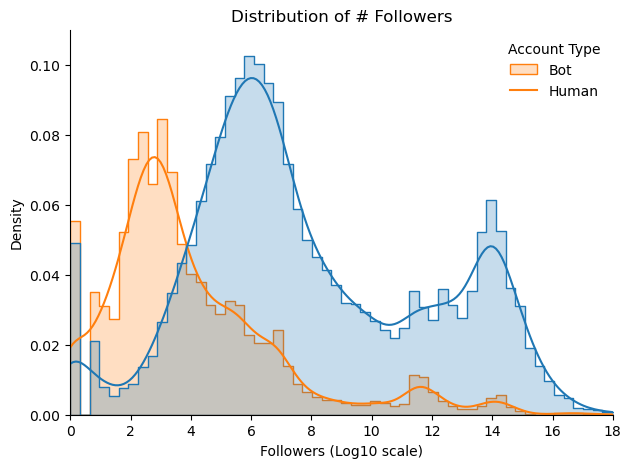

In [23]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='followers_log', data=dfr, hue='bot', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of # Followers', fontsize=12)
plt.xlabel('Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 18)
plt.ylim(0, 0.11)
sns.despine();
#plt.savefig('imgs/dist_followers.png');


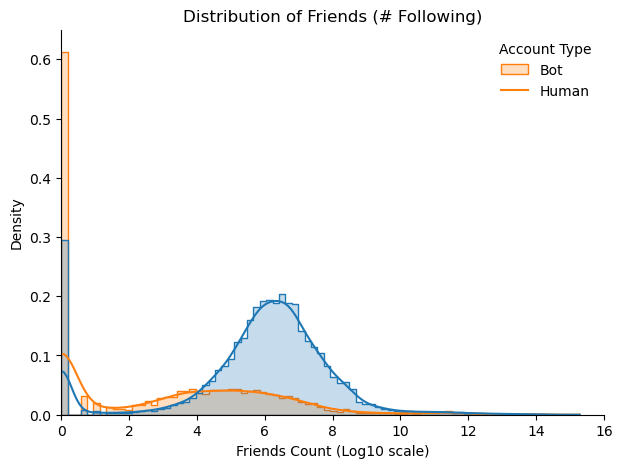

In [24]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='friends_log', data=dfr, hue='bot', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Friends (# Following)', fontsize=12)
plt.xlabel('Friends Count (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 16)
plt.ylim(0, 0.65)
sns.despine();


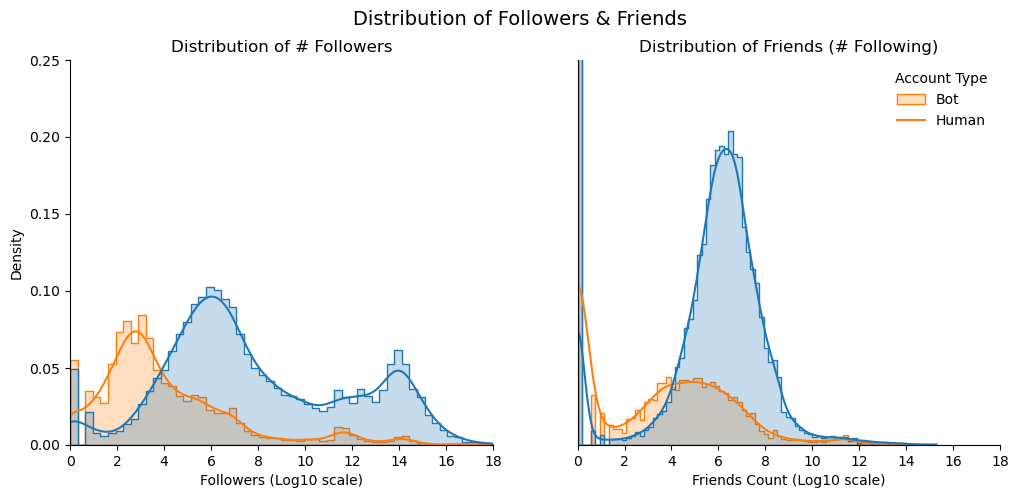

In [25]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Distribution of Followers & Friends', fontsize=14)

plt.subplot(1, 2, 1)
sns.histplot(x='followers_log', data=dfr, hue='bot', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=False)
plt.title('Distribution of # Followers', fontsize=12)
plt.xlabel('Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 18)
plt.ylim(0, 0.25)
sns.despine()

plt.subplot(1, 2, 2)
sns.histplot(x='friends_log', data=dfr, hue='bot', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Friends (# Following)', fontsize=12)
plt.xlabel('Friends Count (Log10 scale)', fontsize=10)
plt.ylabel("")
plt.yticks([])
plt.xlim(0, 18)
plt.ylim(0, 0.25)
sns.despine();
#plt.savefig('imgs/dist_followers_friends.png');


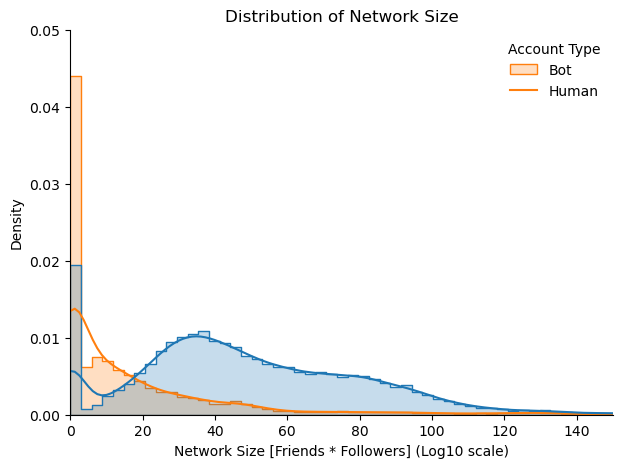

In [26]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='network', data=dfr, hue='bot', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title('Distribution of Network Size', fontsize=12)
plt.xlabel('Network Size [Friends * Followers] (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 150)
plt.ylim(0, 0.05)
sns.despine();
#plt.savefig('imgs/network_size.png');

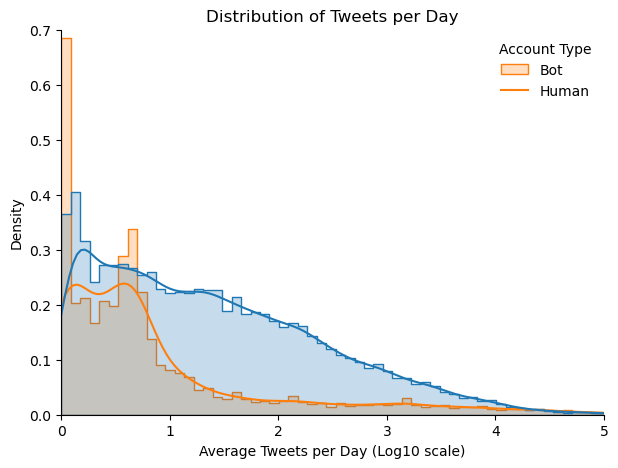

In [27]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='avg_daily_tweets_log', data=dfr, hue='bot', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title("Distribution of Tweets per Day", fontsize=12)
plt.xlabel('Average Tweets per Day (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 5)
plt.ylim(0, 0.7)
sns.despine();
#plt.savefig('imgs/tweets_per_day.png');

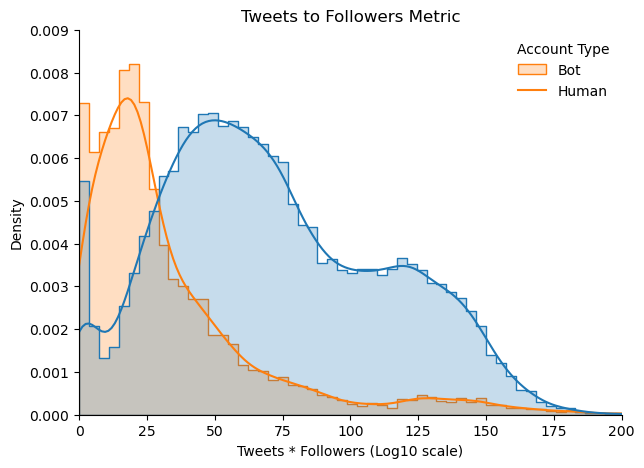

In [28]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='tweet_to_followers', data=dfr, hue='bot', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='upper right', labels=['Bot', 'Human'], frameon=False)
plt.title("Tweets to Followers Metric", fontsize=12)
plt.xlabel('Tweets * Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 200)
plt.ylim(0, 0.009)
sns.despine();
#plt.savefig('imgs/tweets_to_followers.png');

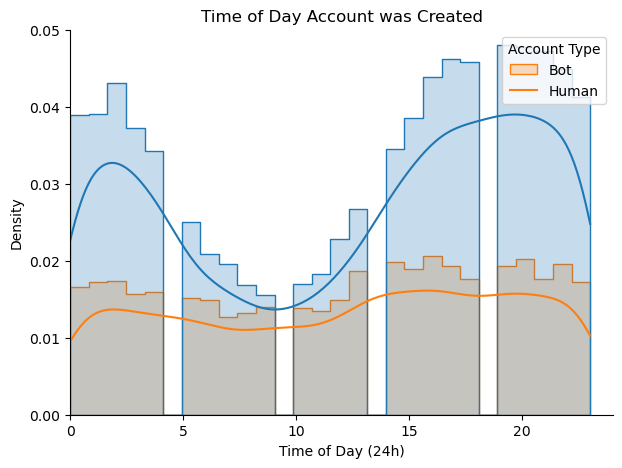

In [29]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='hour_created', data=dfr, hue='bot', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Account Type', loc='best', labels=['Bot', 'Human'])
plt.title("Time of Day Account was Created", fontsize=12)
plt.xlabel('Time of Day (24h)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 24)
plt.ylim(0, 0.05)
sns.despine();
#plt.savefig('imgs/hour_created.png');

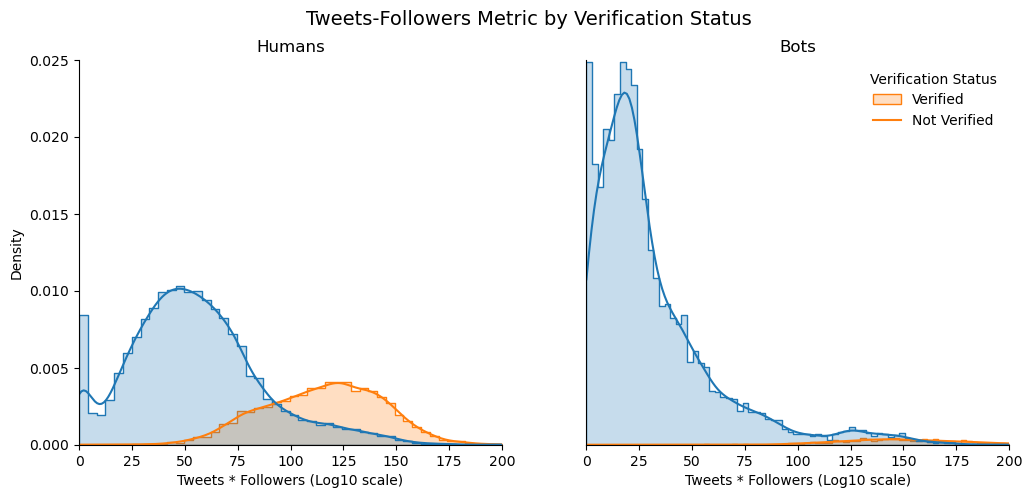

In [30]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Tweets-Followers Metric by Verification Status', fontsize=14)

plt.subplot(1, 2, 1)
sns.histplot(x='tweet_to_followers', data=humans, hue='verified', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=False)

plt.title("Humans", fontsize=12)
plt.xlabel('Tweets * Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine(bottom = True, left = True)
plt.xlim(0, 200)
plt.ylim(0, 0.025)

plt.subplot(1, 2, 2)
sns.histplot(x='tweet_to_followers', data=bots, hue='verified', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)

plt.legend(title='Verification Status', loc='upper right', labels=['Verified', 'Not Verified'], frameon=False)
plt.title("Bots", fontsize=12)
plt.xlabel('Tweets * Followers (Log10 scale)', fontsize=10)
plt.ylabel("")
plt.yticks([])
sns.despine()
plt.xlim(0, 200)
plt.ylim(0, 0.025);
#plt.savefig('imgs/tweets_to_follows_by_verification_status.png');

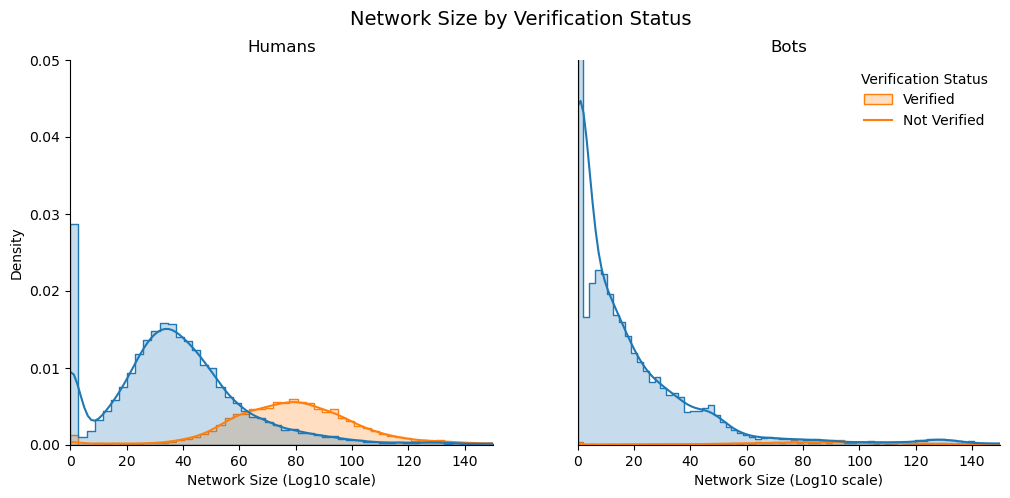

In [31]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Network Size by Verification Status', fontsize=14)

plt.subplot(1, 2, 1)
sns.histplot(x='network', data=humans, hue='verified', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=False)
plt.xlabel('Network Size (Friends * Followers)')
plt.title("Humans", fontsize=12)
plt.xlabel('Network Size (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine(bottom = True, left = True)
plt.xlim(0, 150)
plt.ylim(0, 0.05)

plt.subplot(1, 2, 2)
sns.histplot(x='network', data=bots, hue='verified', alpha=.25,
             kde=True, stat='density', common_bins=True, element='step', legend=True)
plt.xlabel('Network Size (Friends * Followers)')
plt.legend(title='Verification Status', loc='upper right', labels=['Verified', 'Not Verified'], frameon=False)
plt.title("Bots", fontsize=12)
plt.xlabel('Network Size (Log10 scale)', fontsize=10)
plt.ylabel("")
plt.yticks([])
sns.despine()
plt.xlim(0, 150)
plt.ylim(0, 0.05);
#plt.savefig('imgs/network_size_by_verification_status.png');

In [32]:
features = ['verified',
            #'created_at',
            #'hour_created',
            #'lang',
            #'acct_location',
            'geo_enabled',
            'default_profile',
            'default_profile_image',
            'favourites_count',
            'followers_count',
            'friends_count',
            'statuses_count',
            'average_tweets_per_day',
            #'avg_daily_followers',
            #'avg_daily_friends',
            #'avg_daily_favorites',
            'network',
            'tweet_to_followers',
            'follower_acq_rate',
            'friends_acq_rate',
            'favs_rate'
           ]

X = dfr[features]
y = dfr['bot']

In [33]:
!pip install psycopg2

In [34]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split


dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.86644
Test Accuracy: 0.84673


In [36]:
# Print the classification report for the test set
report = classification_report(y_test, y_pred_test)
print("Classification Report (Test Set):\n", report)

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      5260
           1       0.83      0.68      0.75      2602

    accuracy                           0.85      7862
   macro avg       0.84      0.80      0.82      7862
weighted avg       0.85      0.85      0.84      7862



BALANCING DATASET


In [37]:
num_bots = len(dfr[dfr['bot'] == 1])
num_humans = len(dfr[dfr['bot'] == 0])

print("Number of bots: ", num_bots)
print("Number of humans: ", num_humans)
print(f'Bots / Total %: {(num_bots / len(dfr))*100:.2f}')

Number of bots:  12425
Number of humans:  25013
Bots / Total %: 33.19


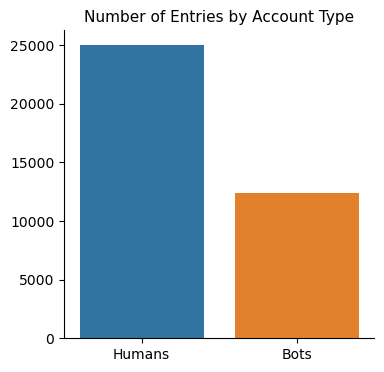

In [38]:
types = ['Humans', 'Bots']
counts = [num_humans, num_bots]

plt.figure(figsize=(4, 4))
sns.barplot(x = types, y = counts)
plt.title("Number of Entries by Account Type", fontsize=11)
sns.despine();

# Random Forest

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Create and train a Random Forest classifier
model = RandomForestClassifier(random_state=1234)  # You can adjust hyperparameters here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model.predict(X_test)

# Evaluate the model's performance (e.g., accuracy)
training_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Training Accuracy: {training_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}")

Training Accuracy: 1.00000
Test Accuracy: 0.87281


In [40]:
# Print the classification report for the test set
report = classification_report(y_test, y_pred_rf)
print("Classification Report (Test Set):\n", report)

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      5188
           1       0.86      0.75      0.80      2674

    accuracy                           0.87      7862
   macro avg       0.87      0.84      0.85      7862
weighted avg       0.87      0.87      0.87      7862



# KNN

In [41]:
# Create and train a KNN classifier (you can specify the number of neighbors with n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Example: 5 neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model's performance (e.g., accuracy)
training_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Training Accuracy: {training_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}")

Training Accuracy: 1.00000
Test Accuracy: 0.84355


In [42]:
# Print the classification report for the test set
report = classification_report(y_test, y_pred_knn)
print("Classification Report (Test Set):\n", report)

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      5188
           1       0.80      0.72      0.76      2674

    accuracy                           0.84      7862
   macro avg       0.83      0.81      0.82      7862
weighted avg       0.84      0.84      0.84      7862



# Logistic Regression

In [43]:
# Create and train a logistic regression model
logistic_regression_model = LogisticRegression(random_state=1234)
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the model's performance (e.g., accuracy)
training_accuracy = accuracy_score(y_train, logistic_regression_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_lr)

print(f"Training Accuracy: {training_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}")

Training Accuracy: 0.67215
Test Accuracy: 0.65861


In [44]:
# Print the classification report for the test set
report = classification_report(y_test, y_pred_lr)
print("Classification Report (Test Set):\n", report)

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.67      0.97      0.79      5188
           1       0.48      0.05      0.10      2674

    accuracy                           0.66      7862
   macro avg       0.57      0.51      0.44      7862
weighted avg       0.60      0.66      0.55      7862



# GaussianNB 

In [45]:
# Create and train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb.predict(X_test)

# Evaluate the Gaussian Naive Bayes model's performance (e.g., accuracy)
training_accuracy_gnb = accuracy_score(y_train, gnb.predict(X_train))
test_accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print("Gaussian Naive Bayes:")
print(f"Training Accuracy: {training_accuracy_gnb:.5f}")
print(f"Test Accuracy: {test_accuracy_gnb:.5f}")

Gaussian Naive Bayes:
Training Accuracy: 0.71849
Test Accuracy: 0.72043


In [46]:
# Print the classification report for the test set
report = classification_report(y_test, y_pred_gnb)
print("Classification Report (Test Set):\n", report)

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.92      0.63      0.75      5188
           1       0.56      0.89      0.69      2674

    accuracy                           0.72      7862
   macro avg       0.74      0.76      0.72      7862
weighted avg       0.80      0.72      0.73      7862



# Bernoulli Naive Bayes classifier

In [47]:
# Create and train a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bnb = bnb.predict(X_test)

# Evaluate the Bernoulli Naive Bayes model's performance (e.g., accuracy)
training_accuracy_bnb = accuracy_score(y_train, bnb.predict(X_train))
test_accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

print("Bernoulli Naive Bayes classifier:")
print(f"Training Accuracy: {training_accuracy_gnb:.5f}")
print(f"Test Accuracy: {test_accuracy_gnb:.5f}")

Bernoulli Naive Bayes classifier:
Training Accuracy: 0.71849
Test Accuracy: 0.72043


In [48]:
# Print the classification report for the test set
report = classification_report(y_test, y_pred_bnb)
print("Classification Report (Test Set):\n", report)

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.75      0.91      0.82      5188
           1       0.70      0.41      0.52      2674

    accuracy                           0.74      7862
   macro avg       0.73      0.66      0.67      7862
weighted avg       0.73      0.74      0.72      7862



# Multinomial Naive Bayes classifier

In [49]:
# Create and train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mnb = mnb.predict(X_test)

# Evaluate the Multinomial Naive Bayes model's performance (e.g., accuracy)
training_accuracy_mnb = accuracy_score(y_train, mnb.predict(X_train))
test_accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

print("\nMultinomial Naive Bayes:")
print(f"Training Accuracy: {training_accuracy_mnb:.5f}")
print(f"Test Accuracy: {test_accuracy_mnb:.5f}")


Multinomial Naive Bayes:
Training Accuracy: 0.46718
Test Accuracy: 0.47393


In [50]:
# Print the classification report for the test set
report = classification_report(y_test, y_pred_mnb)
print("Classification Report (Test Set):\n", report)

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.95      0.21      0.35      5188
           1       0.39      0.98      0.56      2674

    accuracy                           0.47      7862
   macro avg       0.67      0.60      0.45      7862
weighted avg       0.76      0.47      0.42      7862



# XGBoost

In [51]:
# Create and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=1234)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model's performance (e.g., accuracy)
training_accuracy_xgb = accuracy_score(y_train, xgb_model.predict(X_train))
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Classifier:")
print(f"Training Accuracy: {training_accuracy_xgb:.5f}")
print(f"Test Accuracy: {test_accuracy_xgb:.5f}")

XGBoost Classifier:
Training Accuracy: 0.94129
Test Accuracy: 0.87344


In [52]:
# Print the classification report for the test set
report = classification_report(y_test, y_pred_xgb)
print("Classification Report (Test Set):\n", report)

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      5188
           1       0.85      0.76      0.80      2674

    accuracy                           0.87      7862
   macro avg       0.87      0.85      0.85      7862
weighted avg       0.87      0.87      0.87      7862



# ROC 

In [53]:
# Define the classifiers and their names
classifiers = [
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)),
    ('Random Forest', RandomForestClassifier(random_state=1234)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Logistic Regression', LogisticRegression(random_state=1234)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('XGBoost', xgb.XGBClassifier(random_state=1234))
]


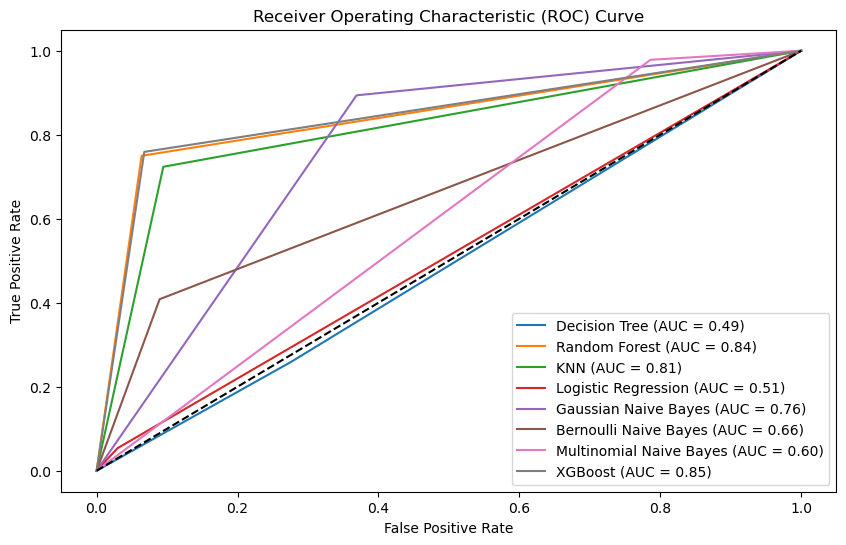

In [54]:
# Create a figure and axis for the ROC curve plot
plt.figure(figsize=(10, 6))

# Plot ROC curves for each classifier
for clf_name, y_pred in zip(classifiers, [y_pred_test, y_pred_rf, y_pred_knn, y_pred_lr, y_pred_gnb, y_pred_bnb, y_pred_mnb, y_pred_xgb]):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name[0]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()

# Confusion Matrix

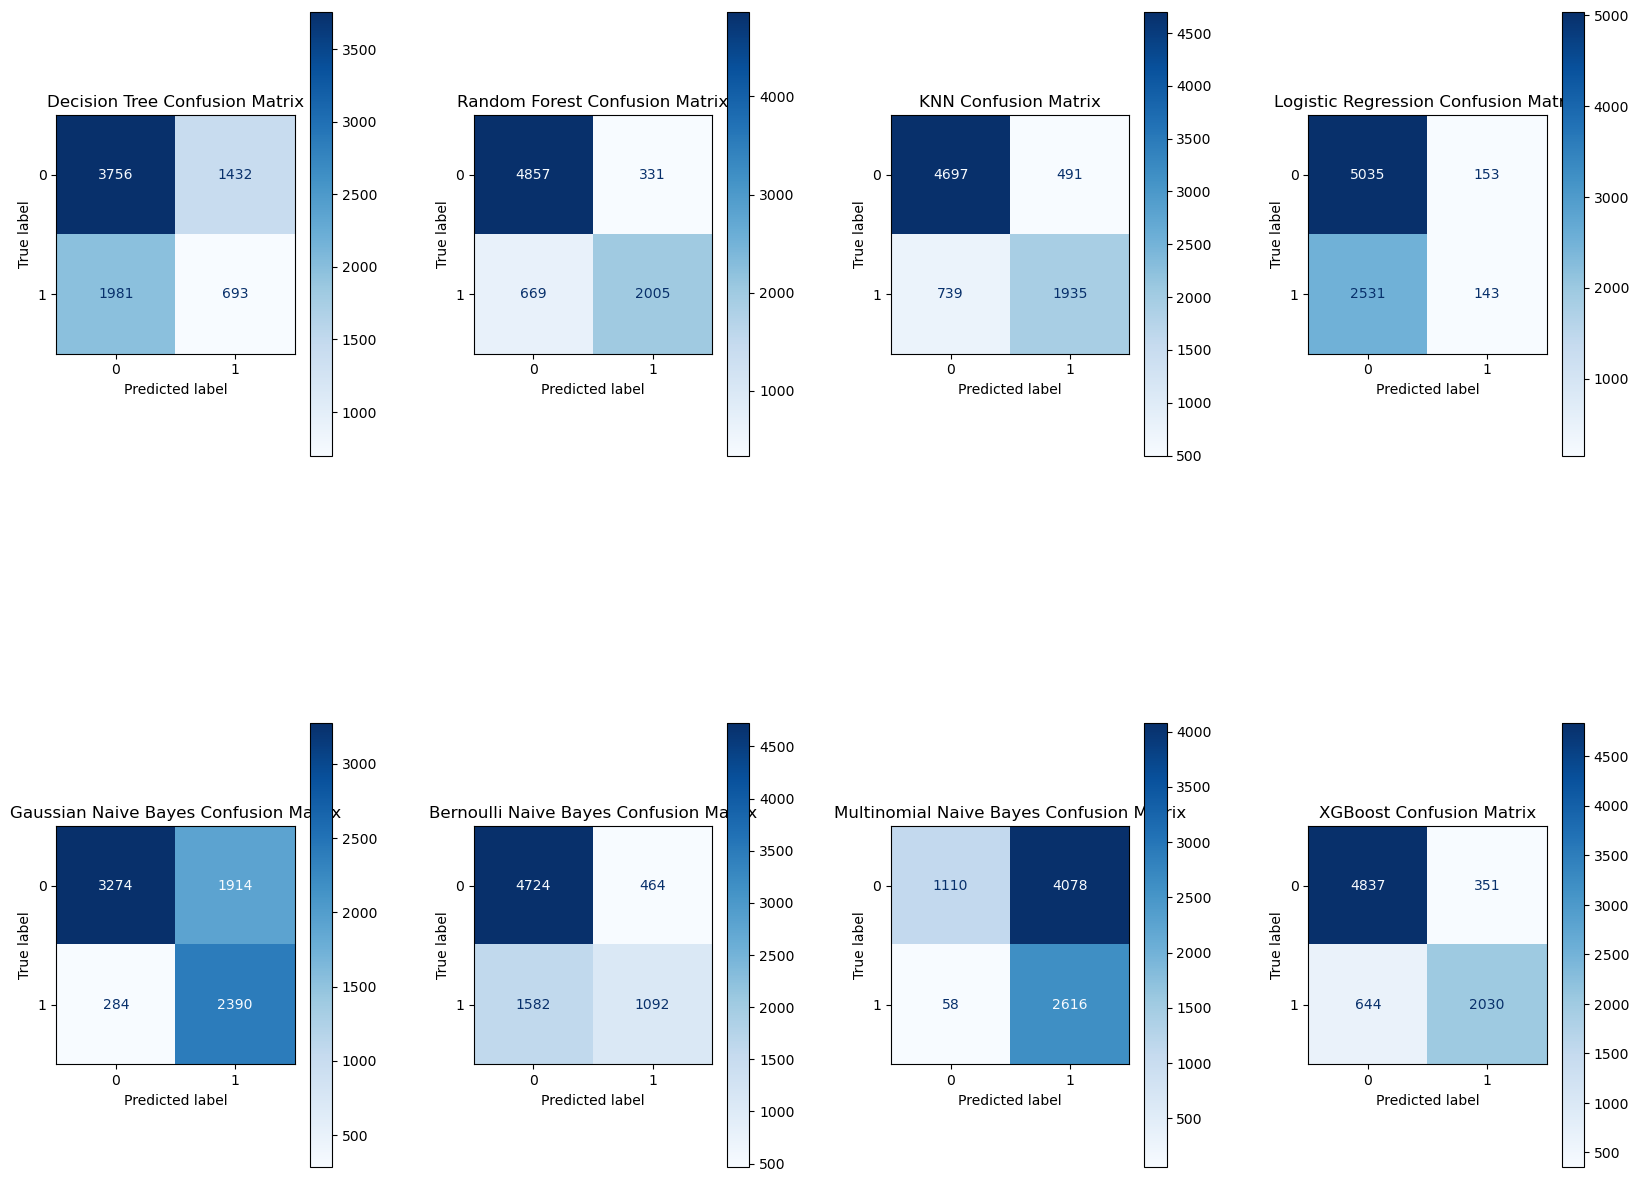

In [55]:
# Create a figure and axis for the confusion matrix plot
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Plot confusion matrices for each classifier
for i, (clf_name, y_pred) in enumerate(zip(classifiers, [y_pred_test, y_pred_rf, y_pred_knn, y_pred_lr, y_pred_gnb, y_pred_bnb, y_pred_mnb, y_pred_xgb])):
    ax = axes[i // 4, i % 4]
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(f'{clf_name[0]} Confusion Matrix')

# Show the confusion matrix plot
plt.show()

# Precision and Recall Curve

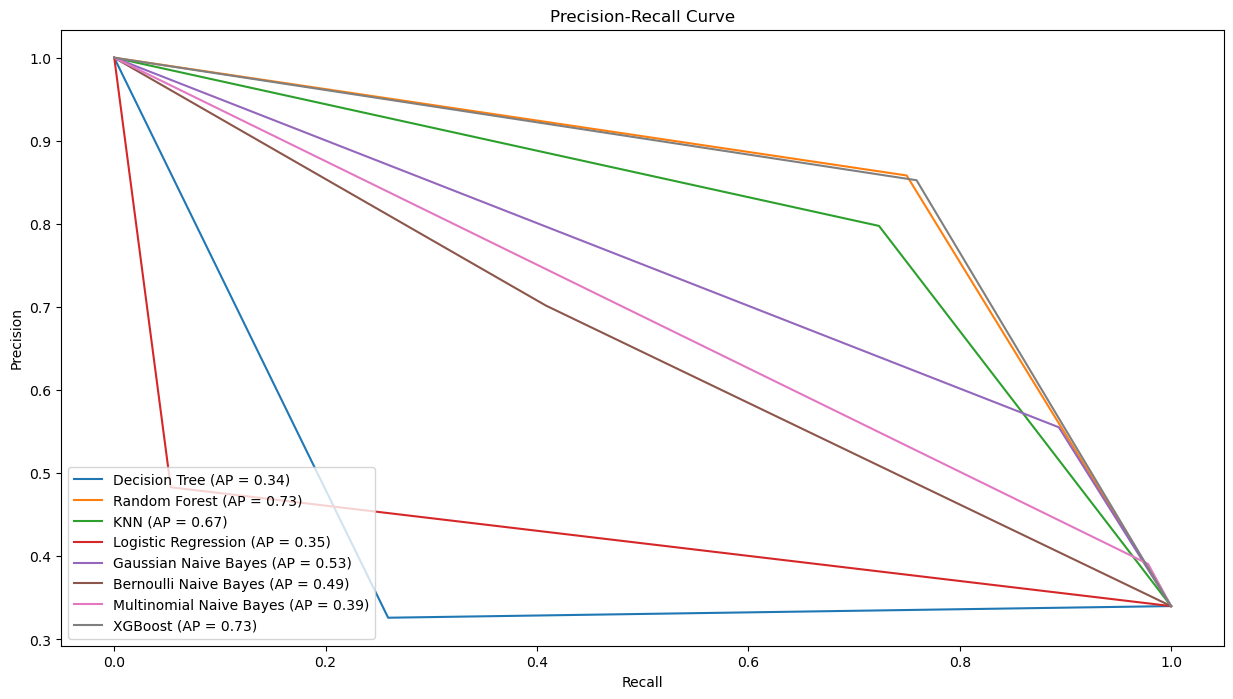

In [56]:
# Create a figure and axis for the Precision-Recall curve plot
plt.figure(figsize=(15, 8))

# Plot Precision-Recall curves for each classifier
for clf_name, y_pred in zip(classifiers, [y_pred_test, y_pred_rf, y_pred_knn, y_pred_lr, y_pred_gnb, y_pred_bnb, y_pred_mnb, y_pred_xgb]):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    plt.plot(recall, precision, label=f'{clf_name[0]} (AP = {average_precision:.2f})')

# Set labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Show the Precision-Recall curve plot
plt.show()

# Comparison of Models

In [57]:
# Define the models and their predictions
models = [
    ("Decision Tree", y_pred_test),
    ("Random Forest", y_pred_rf),
    ("KNN", y_pred_knn),
    ("Logistic Regression", y_pred_lr),
    ("Gaussian Naive Bayes", y_pred_gnb),
    ("XGBoost", y_pred_xgb)
]

# Create an empty DataFrame to store the classification reports
report_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Support"])

# Iterate through the models and calculate classification reports
for model_name, y_pred in models:
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    report_dict = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Support": report["weighted avg"]["support"]
    }
    report_df = report_df.append(report_dict, ignore_index=True)

# Print the comparison table
print(report_df)

                  Model  Accuracy  Precision    Recall  F1-Score Support
0         Decision Tree  0.565887   0.542942  0.565887  0.551963    7862
1         Random Forest  0.872806   0.871919  0.872806  0.870522    7862
2                   KNN  0.843551   0.841455  0.843551  0.841573    7862
3   Logistic Regression  0.658611   0.603450  0.658611  0.553767    7862
4  Gaussian Naive Bayes  0.720427   0.796077  0.720427  0.727028    7862
5               XGBoost  0.873442   0.872327  0.873442  0.871512    7862


# Hyper Parameter Tunning

# Decision Tree Classifier

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create a GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

# Train the best model on the entire training dataset
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred_test = best_dt_model.predict(X_test)

# Evaluate the best model's performance
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy with Best Model: {:.5f}".format(test_accuracy))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Test Accuracy with Best Model: 0.85487


In [59]:
# Make predictions on the test set using the best model
y_pred_test_dt = best_dt_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_test_dt)

# Print the classification report
print("Classification Report (Test Set):\n", report)

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      5260
           1       0.84      0.70      0.76      2602

    accuracy                           0.85      7862
   macro avg       0.85      0.82      0.83      7862
weighted avg       0.85      0.85      0.85      7862



# Random Forest

In [60]:
# Define the RandomForestClassifier with a smaller set of hyperparameters
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1234)

# Train the model on the training dataset
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model.predict(X_test)

# Evaluate the model's performance
training_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_rf)

# Print the classification report
report = classification_report(y_test, y_pred_rf)
print("Classification Report (Test Set):\n", report)

# Print training and test accuracy
print(f"Training Accuracy: {training_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}")

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      5260
           1       0.84      0.70      0.76      2602

    accuracy                           0.86      7862
   macro avg       0.85      0.82      0.83      7862
weighted avg       0.85      0.86      0.85      7862

Training Accuracy: 0.90373
Test Accuracy: 0.85589


# KNN

In [61]:
# Define the KNeighborsClassifier with a smaller set of hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)

# Train the model on the training dataset
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model's performance
training_accuracy = accuracy_score(y_train, knn_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_knn)

# Print the classification report
report = classification_report(y_test, y_pred_knn)
print("Classification Report (Test Set):\n", report)

# Print training and test accuracy
print(f"Training Accuracy: {training_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}")

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      5260
           1       0.79      0.72      0.75      2602

    accuracy                           0.84      7862
   macro avg       0.83      0.81      0.82      7862
weighted avg       0.84      0.84      0.84      7862

Training Accuracy: 0.88465
Test Accuracy: 0.84355


# Logistic Regression 

In [62]:
# Define the LogisticRegression model with default hyperparameters
logistic_regression_model = LogisticRegression(random_state=1234)

# Train the model on the training dataset
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the model's performance
training_accuracy = accuracy_score(y_train, logistic_regression_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_lr)

# Print the classification report
report = classification_report(y_test, y_pred_lr)
print("Classification Report (Test Set):\n", report)

# Print training and test accuracy
print(f"Training Accuracy: {training_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}")

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.67      0.97      0.80      5260
           1       0.47      0.05      0.09      2602

    accuracy                           0.67      7862
   macro avg       0.57      0.51      0.44      7862
weighted avg       0.61      0.67      0.56      7862

Training Accuracy: 0.66861
Test Accuracy: 0.66726


# Gaussian Naive Bayes

In [63]:
# Create and train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb.predict(X_test)

# Evaluate the Gaussian Naive Bayes model's performance
training_accuracy_gnb = accuracy_score(y_train, gnb.predict(X_train))
test_accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Print the classification report
report = classification_report(y_test, y_pred_gnb)
print("Classification Report (Test Set):\n", report)

# Print training and test accuracy
print("Gaussian Naive Bayes:")
print(f"Training Accuracy: {training_accuracy_gnb:.5f}")
print(f"Test Accuracy: {test_accuracy_gnb:.5f}")

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.93      0.60      0.73      5260
           1       0.53      0.90      0.67      2602

    accuracy                           0.70      7862
   macro avg       0.73      0.75      0.70      7862
weighted avg       0.79      0.70      0.71      7862

Gaussian Naive Bayes:
Training Accuracy: 0.69925
Test Accuracy: 0.69957


# XG Boost

In [64]:
# Create and train an XGBoost classifier with default hyperparameters
xgb_model = xgb.XGBClassifier(random_state=1234)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model's performance
training_accuracy_xgb = accuracy_score(y_train, xgb_model.predict(X_train))
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the classification report
report = classification_report(y_test, y_pred_xgb)
print("Classification Report (Test Set):\n", report)

# Print training and test accuracy
print("XGBoost Classifier:")
print(f"Training Accuracy: {training_accuracy_xgb:.5f}")
print(f"Test Accuracy: {test_accuracy_xgb:.5f}")

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      5260
           1       0.85      0.74      0.79      2602

    accuracy                           0.87      7862
   macro avg       0.86      0.84      0.85      7862
weighted avg       0.87      0.87      0.87      7862

XGBoost Classifier:
Training Accuracy: 0.94271
Test Accuracy: 0.86912


# ROC

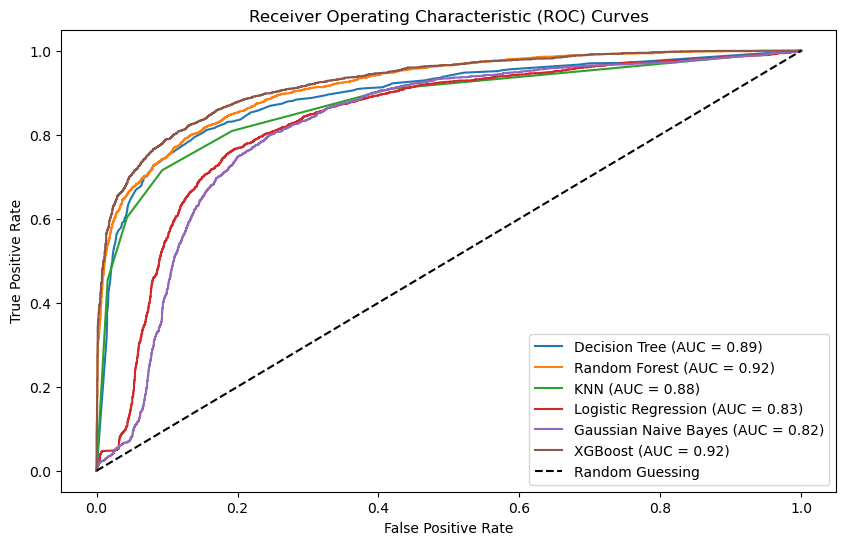

In [65]:
# Define the models and their names
models = [
    (best_dt_model, "Decision Tree"),
    (model, "Random Forest"),
    (knn_model, "KNN"),
    (logistic_regression_model, "Logistic Regression"),
    (gnb, "Gaussian Naive Bayes"),
    (xgb_model, "XGBoost")
]

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate through the models
for model, model_name in models:
    # Get the predicted probabilities for class 1 (positive class)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Confusion Matrix

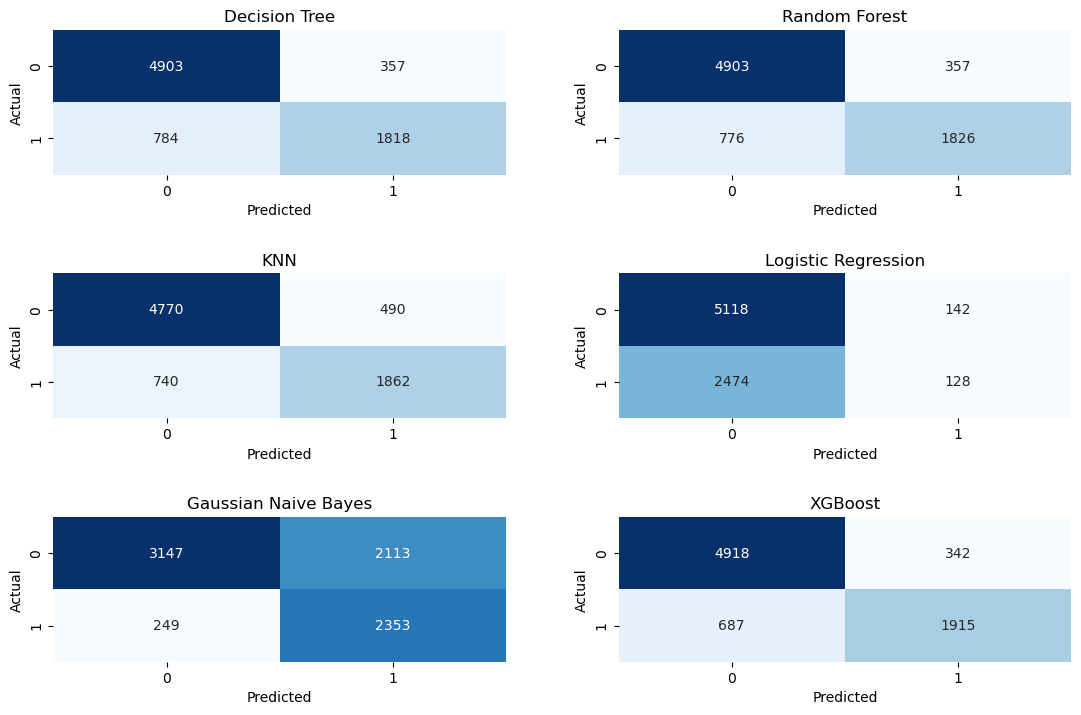

In [66]:
# Set up the plot grid
num_models = len(models)
cols = 2  # Number of columns in the plot grid
rows = (num_models + 1) // cols  # Calculate the number of rows

# Set up the overall figure
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
fig.tight_layout(pad=5.0)  # Adjust the spacing between subplots

# Iterate through the models
for i, (model, model_name) in enumerate(models):
    # Calculate the position of the current subplot in the grid
    ax = axes[i // cols, i % cols]
    
    # Get predicted labels
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
# Adjust layout for the last subplot if the number of models is odd
if num_models % 2 != 0:
    fig.delaxes(axes[rows - 1, cols - 1])

# Show the plot
plt.show()

# Precision and Recall 

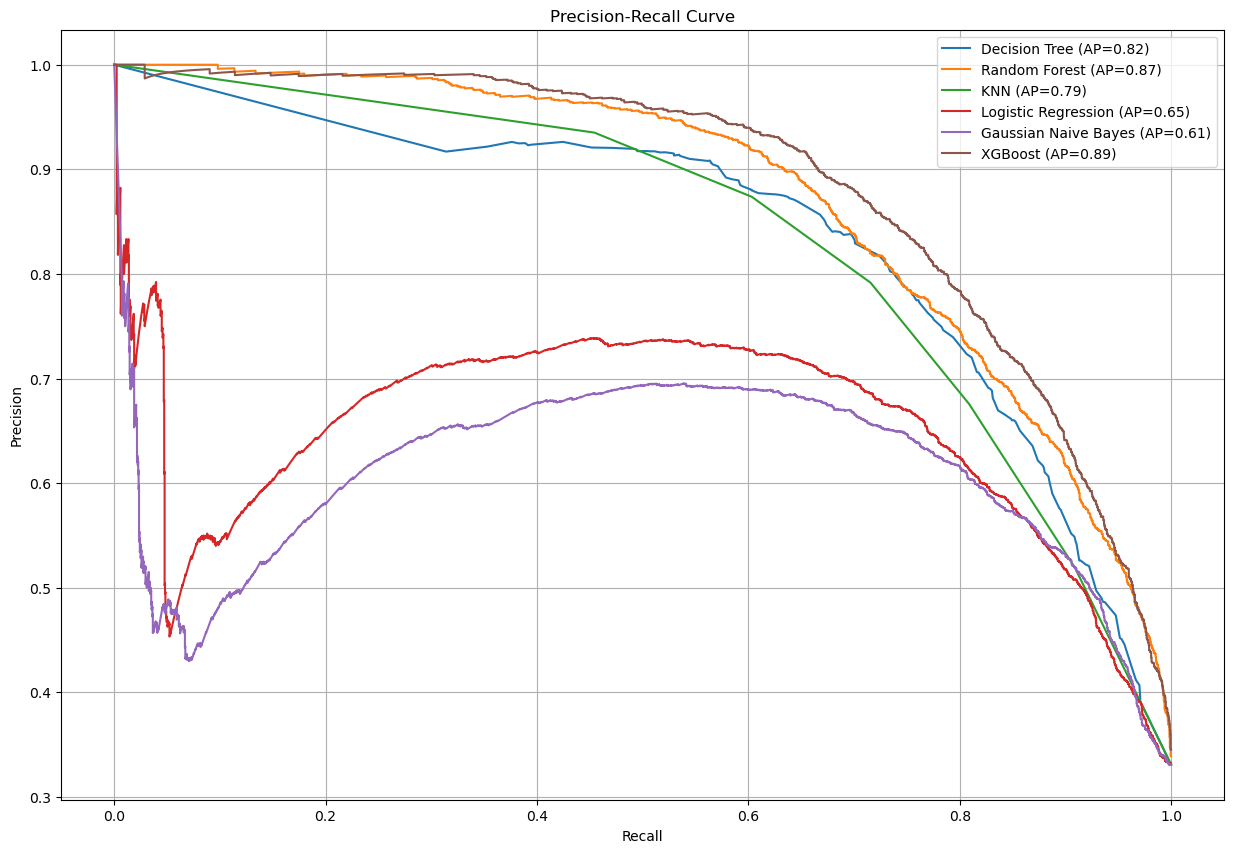

In [67]:
# Set up the plot
plt.figure(figsize=(15, 10))

# Iterate through the models
for model, model_name in models:
    # Get predicted probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    
    # Calculate precision-recall curve values
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    
    # Calculate the average precision score
    average_precision = average_precision_score(y_test, y_probs)
    
    # Plot the precision-recall curve
    plt.plot(recall, precision, label=f'{model_name} (AP={average_precision:.2f})')

# Set plot labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# Show the plot
plt.grid()
plt.show()

In [68]:
# Define the models and their predictions
models = [
    ("Decision Tree", y_pred_test_dt),
    ("Random Forest", y_pred_rf),
    ("KNN", y_pred_knn),
    ("Logistic Regression", y_pred_lr),
    ("Gaussian Naive Bayes", y_pred_gnb),
    ("XGBoost", y_pred_xgb)
]

# Create an empty DataFrame to store the results
report_df = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1-Score", "Support", "Accuracy"])

# Iterate through the models and calculate classification reports
for model_name, y_pred in models:
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    report_dict = {
        "Model": model_name,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Support": report["weighted avg"]["support"],
        "Accuracy": accuracy
    }
    report_df = report_df.append(report_dict, ignore_index=True)

# Print the comparison table
print(report_df)

                  Model  Precision    Recall  F1-Score Support  Accuracy
0         Decision Tree   0.853444  0.854872  0.851216    7862  0.854872
1         Random Forest   0.854456  0.855889  0.852339    7862  0.855889
2                   KNN   0.841197  0.843551  0.841420    7862  0.843551
3   Logistic Regression   0.607920  0.667260  0.562359    7862  0.667260
4  Gaussian Naive Bayes   0.794358  0.699568  0.706835    7862  0.699568
5               XGBoost   0.867846  0.869117  0.866549    7862  0.869117


# Comparison with and without Hyper Parameter Tunning

In [69]:
# Print the table after hyperparameter tuning
print("Table after Hyperparameter Tuning:")
print(report_df)

# Define the models and their predictions (before tuning)
models_before_tuning = [
    ("Decision Tree", y_pred_test),
    ("Random Forest", y_pred_rf),
    ("KNN", y_pred_knn),
    ("Logistic Regression", y_pred_lr),
    ("Gaussian Naive Bayes", y_pred_gnb),
    ("XGBoost", y_pred_xgb)
]

# Create an empty DataFrame to store the classification reports (before tuning)
report_df_before_tuning = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Support"])

# Iterate through the models and calculate classification reports (before tuning)
for model_name, y_pred in models_before_tuning:
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    report_dict = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Support": report["weighted avg"]["support"]
    }
    report_df_before_tuning = report_df_before_tuning.append(report_dict, ignore_index=True)

# Print the table before hyperparameter tuning
print("\nTable before Hyperparameter Tuning:")
print(report_df_before_tuning)

Table after Hyperparameter Tuning:
                  Model  Precision    Recall  F1-Score Support  Accuracy
0         Decision Tree   0.853444  0.854872  0.851216    7862  0.854872
1         Random Forest   0.854456  0.855889  0.852339    7862  0.855889
2                   KNN   0.841197  0.843551  0.841420    7862  0.843551
3   Logistic Regression   0.607920  0.667260  0.562359    7862  0.667260
4  Gaussian Naive Bayes   0.794358  0.699568  0.706835    7862  0.699568
5               XGBoost   0.867846  0.869117  0.866549    7862  0.869117

Table before Hyperparameter Tuning:
                  Model  Accuracy  Precision    Recall  F1-Score Support
0         Decision Tree  0.854872   0.853444  0.854872  0.851216    7862
1         Random Forest  0.855889   0.854456  0.855889  0.852339    7862
2                   KNN  0.843551   0.841197  0.843551  0.841420    7862
3   Logistic Regression  0.667260   0.607920  0.667260  0.562359    7862
4  Gaussian Naive Bayes  0.699568   0.794358  0.6995

1) XGBoost has the highest values for Precision, Recall, F1-Score, and Accuracy among all the models. It appears to be the top-performing model after hyperparameter tuning.

2) Random Forest also has high values for Precision, Recall, F1-Score, and Accuracy, making it one of the top-performing models.

# Ensemble Learning

In [70]:
from sklearn.ensemble import VotingClassifier

# Create individual models
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1234)
model_xgb = xgb.XGBClassifier(random_state=1234)

# Create a VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', model_rf),
    ('XGBoost', model_xgb)
], voting='soft')  # 'soft' for weighted average, 'hard' for majority vote

# Train the ensemble model on the training dataset
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model's performance
training_accuracy_ensemble = accuracy_score(y_train, ensemble_model.predict(X_train))
test_accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

# Print the classification report for the ensemble model
report_ensemble = classification_report(y_test, y_pred_ensemble)
print("Classification Report (Test Set) - Ensemble:\n", report_ensemble)

# Print training and test accuracy for the ensemble model
print("Ensemble Model:")
print(f"Training Accuracy: {training_accuracy_ensemble:.5f}")
print(f"Test Accuracy: {test_accuracy_ensemble:.5f}")


Classification Report (Test Set) - Ensemble:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      5260
           1       0.86      0.72      0.78      2602

    accuracy                           0.87      7862
   macro avg       0.87      0.83      0.84      7862
weighted avg       0.87      0.87      0.87      7862

Ensemble Model:
Training Accuracy: 0.92826
Test Accuracy: 0.86848


# Feature Importance Chart 

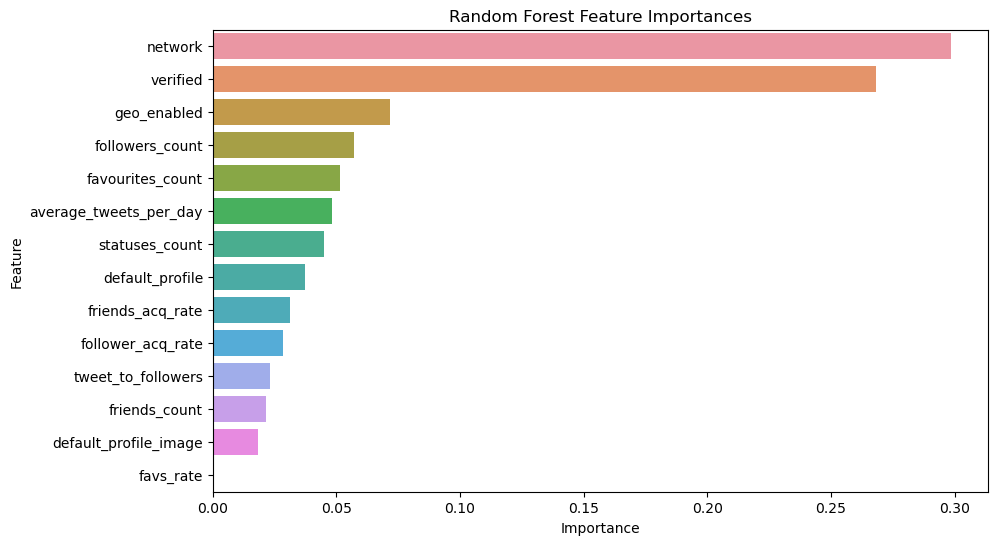

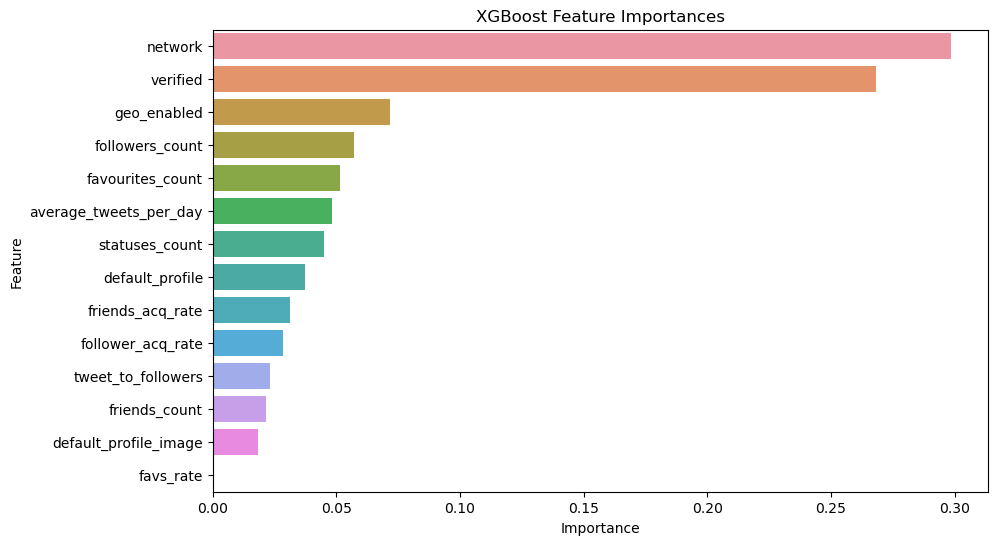

In [71]:
# Feature importances for RandomForestClassifier
rf_feature_importances = model.feature_importances_

# Get the column names (feature names)
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances})

# Sort the DataFrame by importance in descending order
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for RandomForestClassifier
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Feature importances for XGBoostClassifier
xgb_feature_importances = xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importances for XGBoost
xgb_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_feature_importances})

# Sort the DataFrame by importance in descending order
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for XGBoostClassifier
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_df)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [72]:
# Define the RandomForestClassifier with class-weight balancing
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1234, class_weight='balanced')

# Train the model on the training dataset
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
training_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the classification report
report_rf = classification_report(y_test, y_pred_rf)
print("RandomForest Classifier:")
print("Classification Report (Test Set):\n", report_rf)

# Print training and test accuracy for RandomForest
print(f"Training Accuracy (RandomForest): {training_accuracy_rf:.5f}")
print(f"Test Accuracy (RandomForest): {test_accuracy_rf:.5f}")

RandomForest Classifier:
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      5260
           1       0.77      0.78      0.78      2602

    accuracy                           0.85      7862
   macro avg       0.83      0.83      0.83      7862
weighted avg       0.85      0.85      0.85      7862

Training Accuracy (RandomForest): 0.90493
Test Accuracy (RandomForest): 0.85029


In [73]:
# Define the XGBoostClassifier with class-weight balancing
xgb_model = xgb.XGBClassifier(random_state=1234, scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum())

# Train the model on the training dataset
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model's performance
training_accuracy_xgb = accuracy_score(y_train, xgb_model.predict(X_train))
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the classification report for XGBoost
report_xgb = classification_report(y_test, y_pred_xgb)
print("\nXGBoost Classifier:")
print("Classification Report (Test Set):\n", report_xgb)

# Print training and test accuracy for XGBoost
print(f"Training Accuracy (XGBoost): {training_accuracy_xgb:.5f}")
print(f"Test Accuracy (XGBoost): {test_accuracy_xgb:.5f}")


XGBoost Classifier:
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5260
           1       0.79      0.79      0.79      2602

    accuracy                           0.86      7862
   macro avg       0.84      0.84      0.84      7862
weighted avg       0.86      0.86      0.86      7862

Training Accuracy (XGBoost): 0.94914
Test Accuracy (XGBoost): 0.86149


### Change the emsemble model architecture( add worst performing model(i.e decision tree), the same performing model before and after tuning(i.e knn), best performing model(i.e XG boost).

In [74]:
# Define the DecisionTreeClassifier (worst-performing model)
worst_dt_model = DecisionTreeClassifier(random_state=101)

# Define the K-Nearest Neighbors model (same performing model)
# Assuming you have trained and evaluated the KNN model and stored it as 'best_knn_model'
best_knn_model = KNeighborsClassifier(n_neighbors=5)  # Replace with your best KNN model

# Define the XGBoost model (best-performing model)
# Assuming you have trained and evaluated the XGBoost model and stored it as 'best_xgb_model'
best_xgb_model = xgb.XGBClassifier(random_state=1234)  # Replace with your best XGBoost model

# Create an ensemble model using a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('decision_tree', worst_dt_model),
        ('knn', best_knn_model),
        ('xgboost', best_xgb_model)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model's performance
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

# Print the ensemble model's accuracy
print("Ensemble Model Accuracy: {:.5f}".format(ensemble_accuracy))

Ensemble Model Accuracy: 0.86683
